In [1]:
pip install git+https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git

  Cloning https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to /tmp/pip-req-build-y0av_egn
  Running command git clone --filter=blob:none --quiet https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git /tmp/pip-req-build-y0av_egn
  Resolved https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to commit 7ed23a6f005bc312e187f28b477cf436c3ff7fba
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qiskit import QuantumCircuit
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

Uno de los campos donde Chile a destacado en la última decada es la __astronomía__. El norte de Chile, dotado de cielos idoneas para realizar astronomía observacional, alberga algunos de los telescopios más importantes del mundos, tales como ALMA, Paranal, Gemini, Las Campanas, Tololo y SOAR. Estos telescopios generan vastos volumenes de datos sobre objetos astronomicos, los cuales deben ser procesados para su estudio. Debido a esto, el estudio y desarrollo de herramientas númericas para procesar datos astronomicos es de gran relevancia para Chile. En este desafío veremos la computación cuántica puede aplicarse a este ambito.

Una galaxia es un conjunto de estrellas, planetas, polvo, materia y energía oscura unidas gravitatoriamente en una estructura más o menos definida. Estas pueden clasificarse por su morfología en elipticas, espirales, lenticulares e irregulares, tal como resume la __secuencia de Hubble__.

[figura]

La clasificación de galaxias es un campo activo de estudio, donde el uso de herramientas de inteligencia artificial se ha vuelto extremadamente común [Dominguez-Sanchez et al. (2018)](https://academic.oup.com/mnras/article/476/3/3661/4848300); [Barchi et al. (2019)](https://www.sciencedirect.com/science/article/abs/pii/S2213133719300757?via%3Dihub). En este desafío utilizaremos una máquina cuántica de soporte vectorial para clasificar galaxias elipticas y espirales. Utilizaremos datos publicamente disponibles en Galaxy Zoo, un proyecto online que invita a ayudar a clasificar más de un millon de galaxias. Las características de las galaxias en este conjunto de datos se recopilan a partir de las métricas morfológicas proporcionadas en el siguiente catálogo. Se incluyen un total de 6 caracteristicas independientes de la distacia para análisis: la concentración $C$, la asimetría $A$, la suavidad $S$, el segundo momento de gradiente $G2$, la entropía de de información de Shannon $H$ y el área de la elipse petrosiana dividida por el área de la función de dispersión puntual $K$.

In [3]:
data = pd.read_csv("galaxia_mod.csv",  low_memory=False )
data = data[['spiral=1 elliptical=0','C','A','S','G2', 'H', 'K']]
data = data.drop_duplicates() # Eliminar Duplicados
data.head(10)

,spiral=1 elliptical=0,C,A,S,G2,H,K
0,1,0.377586,0.820991,0.872967,1.646847,0.753667,18.523393
1,1,0.481648,0.918934,0.811223,1.558076,0.695033,9.387313
2,0,0.468097,0.896377,0.890470,1.273454,0.633161,6.437712
3,1,0.324003,0.763444,0.852662,1.793868,0.848901,18.569745
4,0,0.464912,0.868397,0.849914,0.667866,0.511509,9.625444
5,0,0.603811,0.812854,0.349620,0.530258,0.497737,36.433943
6,1,0.336279,0.877052,0.880690,1.617068,0.711718,9.599356
7,1,0.373332,0.718354,0.777832,1.151588,0.653070,22.308795
8,1,0.382949,0.849003,0.821886,1.231995,0.612244,9.031537
9,1,0.485651,0.883585,0.804968,1.567016,0.687035,8.545871


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215681 entries, 0 to 215684
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   spiral=1 elliptical=0  215681 non-null  int64  
 1   C                      215681 non-null  float64
 2   A                      215681 non-null  float64
 3   S                      215681 non-null  float64
 4   G2                     215681 non-null  float64
 5   H                      215681 non-null  float64
 6   K                      215681 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 13.2 MB


Debido a la gran cantidad de datos, realizaremos una muestra estratificada para preservar la proporción entre galaxias espirales y elípticas.

In [5]:
# Tamaño de la muestra: 0.1% del dataset
sample_size = 0.001

# Dividir en una muestra estratificada
df_sample, _ = train_test_split(
                                data,
                                stratify=data['spiral=1 elliptical=0'],  # Variable para estratificación
                                test_size=(1 - sample_size),  # 99.9% quedará fuera de la muestra
                                random_state=42  # Semilla para reproducibilidad
                                )

In [6]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 135333 to 142807
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   spiral=1 elliptical=0  215 non-null    int64  
 1   C                      215 non-null    float64
 2   A                      215 non-null    float64
 3   S                      215 non-null    float64
 4   G2                     215 non-null    float64
 5   H                      215 non-null    float64
 6   K                      215 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 13.4 KB


In [7]:
#Separamos el target de resto del data
X=  df_sample.drop(columns=['spiral=1 elliptical=0'])
y=  df_sample['spiral=1 elliptical=0']

Contamos con 6 características, pero las reduciremos a 4 para simplificar el entrenamiento de nuestra máquina cuántica de soporte vectorial, empleando un análisis de componentes principales.

In [8]:
# Normalizar las características (es recomendable para PCA y SVM)
scaler = MinMaxScaler()
X_normalizado = scaler.fit_transform(X)

# Inicializar el PCA y retener un 96% de la varianza
pca = PCA(n_components=0.96)
X_pca = pca.fit_transform(X_normalizado)

# Mostrar la varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.68265503 0.128477   0.08443644 0.06897231]


Ahora dividimos los datos en conjuntos de entrenamiento y prueba.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=27)

Primero entrenaremos una máquina de soporte vectorial clásica para utilizarla como referencia frente a la cuántica.

In [10]:
# Inicializar el modelo SVM
svm = SVC(kernel='linear')  # Puedes elegir otro kernel si lo deseas

# Entrenar el modelo
svm.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM después de PCA: {accuracy}")

Precisión del modelo SVM después de PCA: 0.9302325581395349


Procederemos a diseñar nuestra máquina cuántica de soporte vectorial.

__Desafio 1:__ Diseñe un circuito cuántico que funcione como el mapeo de características de datos. Este circuito debe incluir 4 qubits, 4 parámetros y tener una profundidad inferior a 20.

In [11]:
# construimos circuito parametrico
def optimized_quantum_circuit():

    # Se construye un circuito cuántico de 4 qubits
    qc_dato = QuantumCircuit(4)

    # Definimos un conjunto de parámetros que serán ajustados
    theta = ParameterVector('θ', 4)

    # Aplicamos puertas Hadamard para generar superposición
    qc_dato.h([0,1,2,3])

    # Aplicamos puertas de rotación RX y RY para modificar el estado de los qubits
    qc_dato.rz(2 * theta[0], 0)
    qc_dato.rz(2 * theta[1], 1)
    qc_dato.rz(2 * theta[2], 2)
    qc_dato.rz(2 * theta[3], 3)

    # Realizamos puertas CX (controladas) entre pares de qubits
    qc_dato.cx(0,1)
    qc_dato.rz(2 * np.pi - abs(theta[0] - theta[1]),1)
    qc_dato.cx(0,1)

    qc_dato.cx(0,2)
    qc_dato.rz(2 * np.pi - abs(theta[0] - theta[2]),2)
    qc_dato.cx(0,2)

    qc_dato.cx(1,2)
    qc_dato.rz(2 * np.pi - abs(theta[1] - theta[2]),2)
    qc_dato.cx(1,2)

    qc_dato.cx(0,3)
    qc_dato.rz(2 * np.pi - abs(theta[0] - theta[3]),3)
    qc_dato.cx(0,3)

    qc_dato.cx(1,3)
    qc_dato.rz(2 * np.pi - abs(theta[1] - theta[3]),3)
    qc_dato.cx(1,3)

    qc_dato.cx(2,3)
    qc_dato.rz(2 * np.pi - abs(theta[2] - theta[3]),3)
    qc_dato.cx(2,3)

    # # Aplicamos puertas de rotación RY para modificar el estado de los qubits
    # qc_dato.ry(2 * theta[0], 0)
    # qc_dato.ry(2 * theta[1], 1)
    # qc_dato.ry(2 * theta[2], 2)
    # qc_dato.ry(2 * theta[3], 3)

    # # Realizamos puertas CX (controladas) entre pares de qubits
    # qc_dato.cx(0,1)
    # qc_dato.ry(2 * np.pi - abs(theta[0] - theta[1]),1)
    # qc_dato.cx(0,1)

    # qc_dato.cx(0,2)
    # qc_dato.ry(2 * np.pi - abs(theta[0] - theta[2]),2)
    # qc_dato.cx(0,2)

    # qc_dato.cx(1,2)
    # qc_dato.ry(2 * np.pi - abs(theta[1] - theta[2]),2)
    # qc_dato.cx(1,2)

    # qc_dato.cx(0,3)
    # qc_dato.ry(2 * np.pi - abs(theta[0] - theta[3]),3)
    # qc_dato.cx(0,3)

    # qc_dato.cx(1,3)
    # qc_dato.ry(2 * np.pi - abs(theta[1] - theta[3]),3)
    # qc_dato.cx(1,3)

    # qc_dato.cx(2,3)
    # qc_dato.ry(2 * np.pi - abs(theta[2] - theta[3]),3)
    # qc_dato.cx(2,3)


    ####

    return qc_dato
    ###

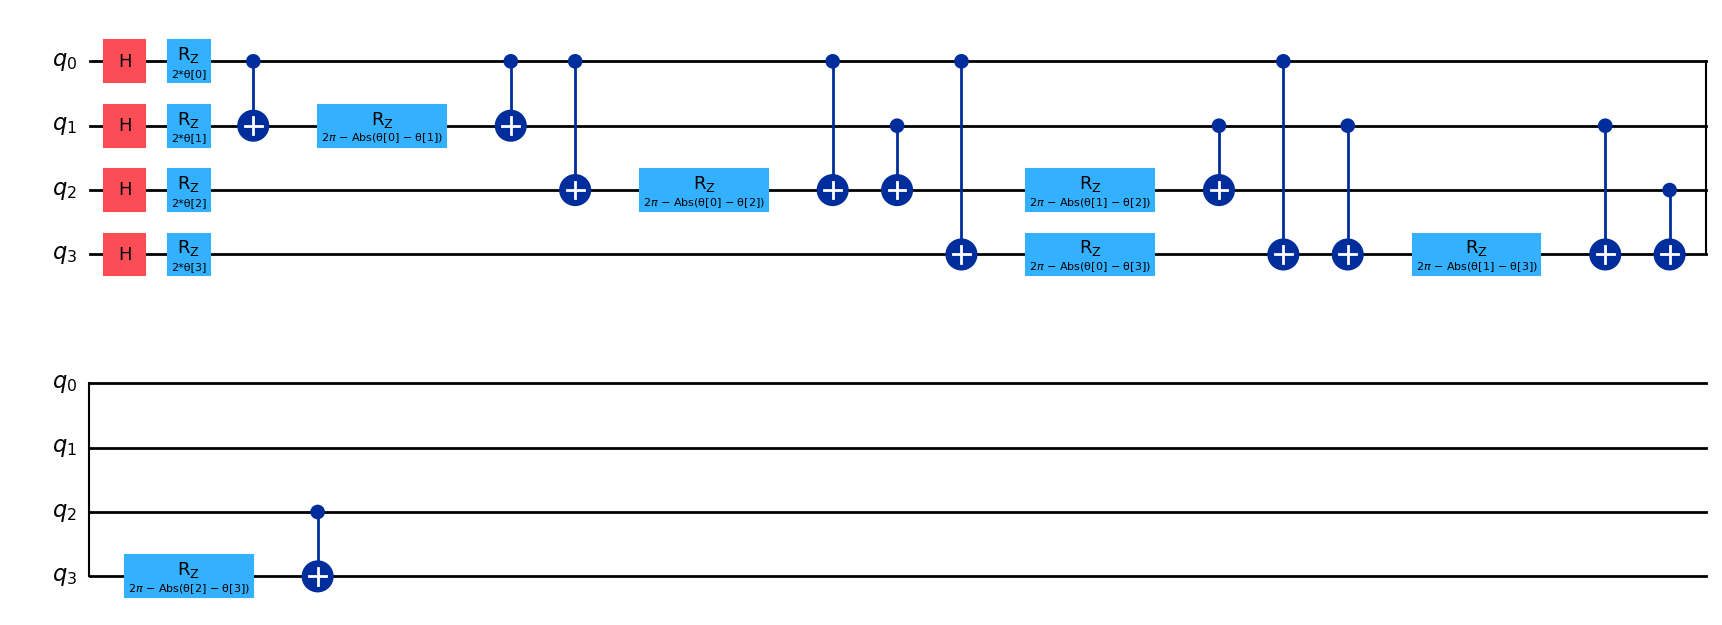

In [12]:
qc_optimizado = optimized_quantum_circuit()
qc_optimizado.draw('mpl')

La evaluación de los elementos del kernel requiere calcular la fidelidad entre dos estados cuánticos $|\psi\rangle$ y  $|\phi\rangle$, definida como:
$$  F(|\psi\rangle,|\phi\rangle) =  | \langle \psi | \phi\rangle |^2. $$
Una forma de realizar este cálculo es mediante el __swap test__. Este consiste en codificar ambos estados en conjuntos independientes de registros cuánticos, y en utilizar un qubit auxiliar y una secuacias de puertas SWAP controladas, tal como muestra la siguiente figura. Esto permite mapear la fidelidad $F$ entre ambos estados al qubit auxiliar, información que puede ser extraida por una medida del observable $\sigma_z$.

![](https://github.com/LucianoPereiraValenzuela/ECC_2025_testing/blob/main/img/ECC2025_swap_test.png?raw=true)

__Desafio:__ Complete la siguiente función para evaluar un elemento del kernel cuántico utilizando el método del swap test.

In [13]:
# contruimos un circuito de swap test
def kernel_element( dato_1, dato_2,
                    backend=Estimator(options={'seed':1}), shots=1000  ):

    value = 0 # resultado por defecto
    # Se define un circuito cuántico de 9 qubits
    qc_swap_test = QuantumCircuit( 9 )

    # Preparamos los circuitos cuánticos para los datos
    qc_dato1 = qc_optimizado.copy().assign_parameters( dato_1)
    qc_dato2 = qc_optimizado.copy().assign_parameters( dato_2)

    # Combinamos los circuitos cuánticos de los dos datos a comparar
    qc_swap_test.compose( qc_dato1, qubits=[1,2,3,4], inplace=True )
    qc_swap_test.compose( qc_dato2, qubits=[5,6,7,8], inplace=True )

    # Se agrega la puerta Hadamard al qubit auxiliar
    qc_swap_test.h(0)

    # Aplicación de las puertas Controlled-Swap (CSWAP) entre qubits
    qc_swap_test.cswap(0,1,5)
    qc_swap_test.cswap(0,2,6)
    qc_swap_test.cswap(0,3,7)
    qc_swap_test.cswap(0,4,8)

    # Aplicamos nuevamente la puerta Hadamard al qubit auxiliar
    qc_swap_test.h(0)

    # Ejecutamos el circuito cuántico y obtenemos los resultados
    job= backend.run(qc_swap_test,SparsePauliOp(['IIIIIIIIZ'],[1]),shots=shots)
    value=job.result().values[0]

    return qc_swap_test, value

<ipython-input-13-1e9ed996de29>:3: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  backend=Estimator(options={'seed':1}), shots=1000  ):


1.0000000001628446


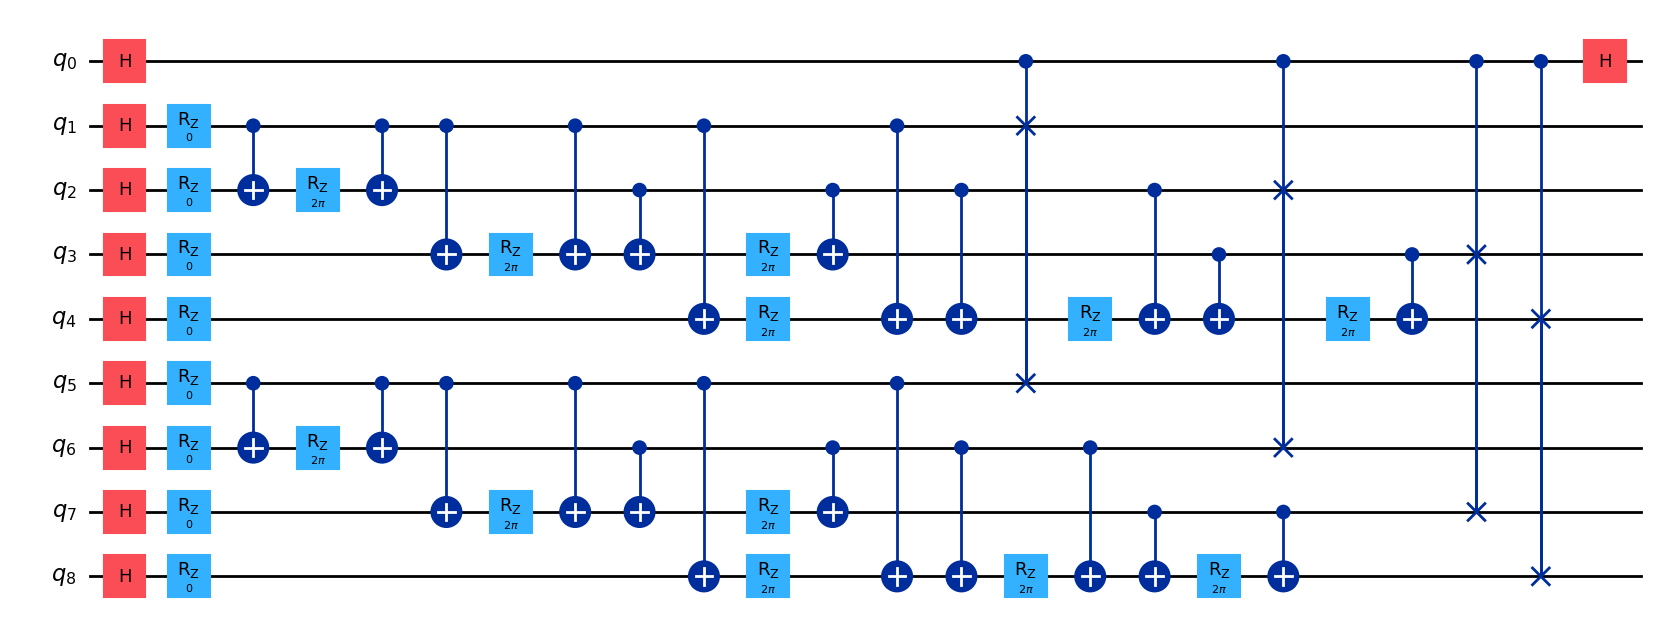

In [14]:
qc_swap_test, value = kernel_element( np.zeros(4), np.zeros(4) )
print( value )
qc_swap_test.draw('mpl')

__Desafio 3:__ La siguiente función construye el kernel cuántico y realiza el entrenamiento de la SVM. Su objetivo es alcanzar una fidelidad superior al 90% en el entrenamiento. Si la fidelidad obtenida es menor, regrese al Desafío 1 e intente un mapeo de características diferente.

In [15]:
# construimos kernel cuantico
def Quantum_Kernel( X_train, X_test=None,
                    backend=Estimator(options={'seed':1}), shots=1000 ):
    """
    X_train : vector bidimensional para entrenar
    X_test  : vector bidimensional para testear
    K_q     : Kernel cuantico
    backend : simulador o computador cuantico
    shots   : numero de shots
    """

    if X_test is None:
        X_test = X_train
    X_train = np.array(X_train)
    X_test  = np.array(X_test)

    # Inicializar la matriz de similitudes cuánticas
    K_q = np.zeros(( X_test.shape[0], X_train.shape[0]))

    values = []
    for x_test in X_test:
        for x_train in X_train:
            # Calcular el valor del kernel cuántico (swap test) entre los datos
            values.append( kernel_element( x_train, x_test,
                                            backend=backend, shots=shots )[1]  )

    l = 0
    for j, x_test in enumerate( X_test ):
        for k, x_train in enumerate( X_train):
            K_q[j,k] = values[l]
            l += 1

    return K_q

<ipython-input-15-04013155340f>:3: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  backend=Estimator(options={'seed':1}), shots=1000 ):


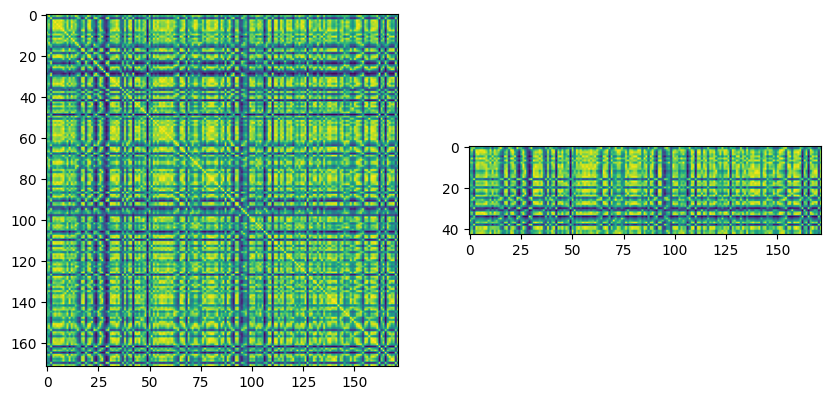

In [16]:
Kq_train = Quantum_Kernel( X_train )
Kq_test  = Quantum_Kernel( X_train, X_test )

# Visualización de las matrices de similitudes
fig, ax = plt.subplots( 1, 2, figsize=(10,5) )
ax[0].imshow( Kq_train )
ax[1].imshow( Kq_test )

In [17]:
# esto va en el archivo de comprobacion de respuestas
def test_7c( Kq_train, y_train, Kq_test, y_test ):
    svm = SVC( kernel = 'precomputed' )
    svm.fit( Kq_train, y_train )
    Y_pred_quantum = svm.predict( Kq_test )

    quantum = confusion_matrix(y_test, Y_pred_quantum)

    ConfusionMatrixDisplay(confusion_matrix=quantum).plot();
    print(classification_report(y_test, Y_pred_quantum))

    if svm.score( Kq_test, y_test ) > 0.90:
        print('Felicidades! Tu discrimindor alcanza una calidad superior al 90%.')
    else:
        print('La fidelidad es inferior al 90%. Vuelve a los desafios anteriores para intentar mejorar tu discriminador.')

    return None

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        33

    accuracy                           0.95        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.95      0.95      0.95        43

Felicidades! Tu discrimindor alcanza una calidad superior al 90%.


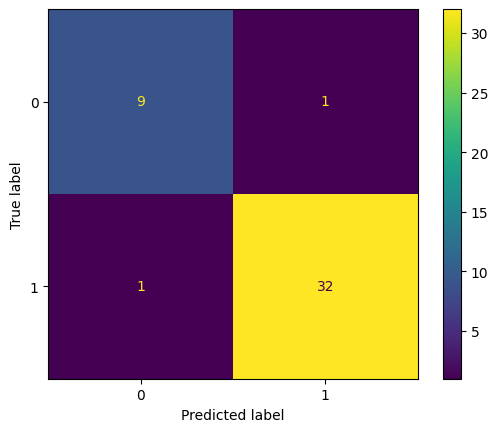

In [18]:
test_7c( Kq_train, y_train, Kq_test, y_test )